# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*In this project I will use 3 datasets related to electricity data. I want to learn more about the electicity generation in European countries. 

*How does renewable energies have developed among electricity generation in Europe?*

*The top countries that produce energy from renewable sources and study if there's a relationship between it  and the electricity wholesale price.*

*I will also look at numbers of demand per capita, CO2 emission and temperature change all over the years.*

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [1]:
import pandas as pd
import requests
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import zipfile
import os

#### **Dataset 1  - ember electricity data**

Type: *CSV File*

Method: Programmatically Downloading File

This dataset is provided by ember climate org and it's about yearly electricity data per country. The dataset will be loaded programmatically using a requests.get method. The dataset has more than 15 variables, but part of them are not necessary for this project and will be dropped later. The important variables that I will use in this data wrangling project are:

Dataset variables:
*   *Area* - In this column we have a list of countries. I will only use european countries.
*   *Year*
*   *Category* - Ex: Power Sector Emission, Electricity generation, etc... I consider that this column has many variables and I will separate them per column later.
*   *Subcategory* - In this column we have information about the values of the Categories. If it's a total, data per capita, data per fuel, etc.. Later I will chose what kind of data I will keep in the dataset.
*   *Variable* - In this column I have each kind of fuel of for example Electricity generation (in Category column).
*   *Unit*
*   *Value* - Value of each category
*   *Variable*




In [2]:
# URL of the CSV file
url = "https://ember-climate.org/app/uploads/2022/07/yearly_full_release_long_format.csv"

# Send an HTTP GET request to the URL
response = requests.get(url)

#Raise an exception if the request resulting in an error
response.raise_for_status()

#Create a dataframe:
ember_electricity_data= pd.read_csv(StringIO(response.text))

#### Dataset 2 - European wholesale electricity prices

Type: *CSV File* 

Method: *Manually*, The data was gathered manually.

This dataset is provided by ember climate org and it's about european wholesale electicity prices. The dataset will be loaded manually. The dataset has 4 variables but I'll only use 3 of them.

Dataset variables:
*   *Country*
*   *Date* - This dataset has only data from 2015 to 2023.
*   *Price* - The prices are in EUR/MWhe

In [3]:
#2nd data gathering and loading method

#website source: 
#https://ember-climate.org/data-catalogue/european-wholesale-electricity-price-data/

#import csv:
electricity_prices = pd.read_csv("european_electricity_price.csv")

#### Dataset 3

Type: *CSV File* 

Method: *Manually*, The data was gathered manually.

This dataset was found in kaggle and it's about temperature change data per yer per country. The dataset will be loaded manually. The dataset has dozens of columns, but only some will be used in the project. There are several columns with the years and the temperature change in each year, bt later these columns will be transformed in a column of Year and a column of value.
There is also information about temperature change and standard deviations but I'll only use temperature change.


In [4]:
#3nd data gathering and loading method

#website source: 
# https://www.kaggle.com/datasets/sevgisarac/temperature-change/data

#import csv:
try:
    temperature_change = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        temperature_change = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='latin1')
    except UnicodeDecodeError:
        temperature_change = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='cp1252')

In [5]:
temperature_change

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,5873,OECD,7018,JunJulAug,6078,Standard Deviation,°C,0.247,0.247,0.247,...,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247,0.247
9652,5873,OECD,7019,SepOctNov,7271,Temperature change,°C,0.036,0.461,0.665,...,0.958,1.106,0.885,1.041,0.999,1.670,1.535,1.194,0.581,1.233
9653,5873,OECD,7019,SepOctNov,6078,Standard Deviation,°C,0.378,0.378,0.378,...,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378,0.378
9654,5873,OECD,7020,Meteorological year,7271,Temperature change,°C,0.165,-0.009,0.134,...,1.246,0.805,1.274,0.991,0.811,1.282,1.850,1.349,1.088,1.297


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Dataset 1 - Quality Issue 1:

In [6]:
#FILL IN - Inspecting the dataframe visually
ember_electricity_data.head(4)

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Clean,GW,0.19,NaN,NaN
1,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Fossil,GW,0.03,NaN,NaN
2,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Gas and Other Fossil,GW,0.03,NaN,NaN
3,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,0.19,NaN,NaN


In [7]:
ember_electricity_data.tail(4)

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
331842,Zimbabwe,ZWE,2021,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Power sector emissions,Fuel,Other Renewables,mtCO2,0.00,0.00,NaN
331843,Zimbabwe,ZWE,2021,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Power sector emissions,Fuel,Solar,mtCO2,0.00,0.00,NaN
331844,Zimbabwe,ZWE,2021,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Power sector emissions,Fuel,Wind,mtCO2,0.00,0.00,NaN
331845,Zimbabwe,ZWE,2021,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Power sector emissions,Total,Total emissions,mtCO2,3.15,0.19,6.42


In [8]:
# Inspecting a sample:
ember_electricity_data.sample(10)

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
204429,Myanmar,MMR,2008,Country,Asia,Asia,0.0,0.0,0.0,0.0,1.0,Power sector emissions,Total,Total emissions,mtCO2,1.47,-0.11,-6.96
126668,Guam,GUM,2019,Country,Oceania,Oceania,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Fossil,%,96.05,NaN,NaN
188249,Martinique,MTQ,2001,Country,North America,Latin America and Caribbean,0.0,0.0,0.0,0.0,0.0,Capacity,Fuel,Solar,GW,0.00,0.00,NaN
167870,Latvia,LVA,2002,Country,Europe,Europe,1.0,1.0,0.0,0.0,0.0,Electricity generation,Fuel,Bioenergy,TWh,0.01,0.01,NaN
111129,G7,NaN,2020,Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity generation,Aggregate fuel,Clean,%,47.19,NaN,NaN
97694,Europe,NaN,2014,Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Electricity generation,Fuel,Coal,%,22.88,NaN,NaN
246470,Reunion,REU,2017,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Capacity,Fuel,Nuclear,GW,NaN,NaN,NaN
269799,Slovakia,SVK,2003,Country,Europe,Europe,1.0,1.0,0.0,0.0,0.0,Capacity,Fuel,Solar,GW,0.00,0.00,NaN
319666,Venezuela (Bolivarian Republic of),VEN,2013,Country,South America,Latin America and Caribbean,0.0,0.0,0.0,0.0,0.0,Electricity generation,Fuel,Coal,%,0.00,NaN,NaN
282737,Sudan (the),SDN,2008,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Electricity demand,Demand,Demand,TWh,5.40,0.46,9.31


In [9]:
#Inspecting the dataframe programmatically
ember_electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331846 entries, 0 to 331845
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Area                 331846 non-null  object 
 1   Country code         312244 non-null  object 
 2   Year                 331846 non-null  int64  
 3   Area type            331846 non-null  object 
 4   Continent            312244 non-null  object 
 5   Ember region         312244 non-null  object 
 6   EU                   312244 non-null  float64
 7   OECD                 312244 non-null  float64
 8   G20                  312244 non-null  float64
 9   G7                   312244 non-null  float64
 10  ASEAN                312244 non-null  float64
 11  Category             331846 non-null  object 
 12  Subcategory          331846 non-null  object 
 13  Variable             331846 non-null  object 
 14  Unit                 331846 non-null  object 
 15  Value            

In [10]:
sum(ember_electricity_data.Value.isnull())

20281

Completeness issue: Looking at the summary of the ember_electricity_data DataFrame returned by .info we can see that there are only 311565 Values entries while there are 331846 entries for the other columns. 20281 null values in "Value" column.

In [11]:
#Check Validity:
#Get the data types of the different variables in the dataframe
ember_electricity_data.dtypes

Area                    object
Country code            object
Year                     int64
Area type               object
Continent               object
Ember region            object
EU                     float64
OECD                   float64
G20                    float64
G7                     float64
ASEAN                  float64
Category                object
Subcategory             object
Variable                object
Unit                    object
Value                  float64
YoY absolute change    float64
YoY % change           float64
dtype: object

In [12]:
#check duplicates
ember_electricity_data.duplicated().sum()

0

There´re no duplicates or wrong data types.

In [13]:
#Checking if there's any inconsistency:
ember_electricity_data.describe()

,Year,EU,OECD,G20,G7,ASEAN,Value,YoY absolute change,YoY % change
count,331846.000000,312244.000000,312244.000000,312244.000000,312244.000000,312244.000000,311565.000000,226411.000000,146257.000000
mean,2010.717905,0.131250,0.182819,0.089693,0.033698,0.046464,65.621913,1.873141,9.647687
std,6.466282,0.337674,0.386518,0.285741,0.180451,0.210487,561.873950,25.998489,163.013195
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.030000,-611.460000,-51275.000000
25%,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.940000
75%,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.970000,0.050000,9.000000
max,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28689.590000,1559.640000,10500.000000


In [14]:
#Checking in which category the Values are negative:
ember_electricity_data_test1=ember_electricity_data[ember_electricity_data["Value"]<0]
ember_electricity_data_test1.Category.unique()

array(['Electricity imports'], dtype=object)

There's no consistency issue whe values are negative because the Category is Electricity imports which is normal, because in this column we have a import/export balance and it means that the value eletricity was exported.

### Dataset 1 - Tidiness Issue 1:

In [15]:
ember_electricity_data.sample(4)

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
325877,Western Sahara,ESH,2020,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Electricity generation,Fuel,Wind,%,NaN,NaN,NaN
267803,Sierra Leone,SLE,2017,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Power sector emissions,Fuel,Solar,mtCO2,0.00,0.0,NaN
172651,Liberia,LBR,2008,Country,Africa,Africa,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Fossil,GW,0.08,0.0,0.0
256390,Saint Pierre and Miquelon,SPM,2018,Country,North America,Latin America and Caribbean,0.0,0.0,0.0,0.0,0.0,Power sector emissions,Fuel,Bioenergy,mtCO2,0.00,0.0,NaN


In [16]:
#Checking categories
ember_electricity_data.Category.unique()

array(['Capacity', 'Electricity demand', 'Electricity generation',
       'Electricity imports', 'Power sector emissions'], dtype=object)

In [17]:
#Checking Subcategories:
ember_electricity_data.Subcategory.unique()

array(['Aggregate fuel', 'Fuel', 'Demand', 'Demand per capita', 'Total',
       'Electricity imports', 'CO2 intensity'], dtype=object)

In [18]:
#Checking Variables:
ember_electricity_data.Variable.unique()

array(['Clean', 'Fossil', 'Gas and Other Fossil',
       'Hydro, Bioenergy and Other Renewables', 'Renewables',
       'Wind and Solar', 'Bioenergy', 'Coal', 'Gas', 'Hydro', 'Nuclear',
       'Other Fossil', 'Other Renewables', 'Solar', 'Wind', 'Demand',
       'Demand per capita', 'Total Generation', 'Net Imports',
       'CO2 intensity', 'Total emissions'], dtype=object)

In [19]:
#Checking when Category is Electricity generation:
test2=ember_electricity_data[ember_electricity_data["Category"]=="Electricity generation"]
test2.Subcategory.unique()

array(['Aggregate fuel', 'Fuel', 'Total'], dtype=object)

In [20]:
test2.Variable.unique()

array(['Clean', 'Fossil', 'Gas and Other Fossil',
       'Hydro, Bioenergy and Other Renewables', 'Renewables',
       'Wind and Solar', 'Bioenergy', 'Coal', 'Gas', 'Hydro', 'Nuclear',
       'Other Fossil', 'Other Renewables', 'Solar', 'Wind',
       'Total Generation'], dtype=object)

Tidiness Issue: Structuring.
I want the data to be annual and per country.
This dataset has lots of data that need to be adressed differently. As we can see in the Category column we have 5 different categories and each one should be in a column so that the information could be more organised and then merged with data from other tables. Each category has its own subcategories and variables. 

The Electricity generation - this data has different subcategories and variables that are the sources of energy. For this information I will create a new dataframe only with electricity generation per source.

### Dataset 1 - Tidiness Issue 2:

In [21]:
#Checking when Category is Electricity demand:
test3=ember_electricity_data[ember_electricity_data["Category"]=="Electricity demand"]
test3.Subcategory.unique()

array(['Demand', 'Demand per capita'], dtype=object)

In [22]:
test3.Variable.unique()

array(['Demand', 'Demand per capita'], dtype=object)

In [23]:
#Checking when Category is Electricity imports:
test4=ember_electricity_data[ember_electricity_data["Category"]=="Electricity imports"]
test4.Subcategory.unique()

array(['Electricity imports'], dtype=object)

In [24]:
test4.Variable.unique()

array(['Net Imports'], dtype=object)

In [25]:
#Checking when Category is Power sector emissions:
test5=ember_electricity_data[ember_electricity_data["Category"]=="Power sector emissions"]
test5.Subcategory.unique()

array(['Aggregate fuel', 'CO2 intensity', 'Fuel', 'Total'], dtype=object)

In [26]:
test5.Variable.unique()

array(['Clean', 'Fossil', 'Gas and Other Fossil',
       'Hydro, Bioenergy and Other Renewables', 'Renewables',
       'Wind and Solar', 'CO2 intensity', 'Bioenergy', 'Coal', 'Gas',
       'Hydro', 'Nuclear', 'Other Fossil', 'Other Renewables', 'Solar',
       'Wind', 'Total emissions'], dtype=object)

Tidiness Issue: Structuring.

For the different categories, I will restructure the data, so that each category will be a column. For that I will first filter the dataframe so that the values be the total values per year per country, with the exception of the Electricity Demand, in which I will only have the values per capita for a better analysis.

### Dataset 2 - Quality Issue 1:

In [27]:
electricity_prices.head()

,Country,ISO3 Code,Date,Price (EUR/MWhe)
0,Austria,AUT,2015-01-01,31.68
1,Austria,AUT,2015-02-01,36.69
2,Austria,AUT,2015-03-01,31.30
3,Austria,AUT,2015-04-01,29.78
4,Austria,AUT,2015-05-01,25.33


In [28]:
electricity_prices.sample(4)

,Country,ISO3 Code,Date,Price (EUR/MWhe)
1944,Netherlands,NLD,2019-04-01,40.84
1684,Luxembourg,LUX,2015-01-01,31.68
1178,Greece,GRC,2020-07-01,41.17
2796,Sweden,SWE,2023-07-01,32.71


In [29]:
#Checking nr. rows and columns:
electricity_prices.shape

(2797, 4)

In [30]:
#Check completness:
electricity_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2797 entries, 0 to 2796
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           2797 non-null   object 
 1   ISO3 Code         2797 non-null   object 
 2   Date              2797 non-null   object 
 3   Price (EUR/MWhe)  2797 non-null   float64
dtypes: float64(1), object(3)
memory usage: 87.5+ KB


In [31]:
#Check statistics:
electricity_prices.describe()

,Price (EUR/MWhe)
count,2797.000000
mean,74.546353
std,74.451840
min,1.880000
25%,35.550000
50%,46.470000
75%,73.620000
max,543.480000


In [32]:
#Check total rows and columns:
electricity_prices.shape

(2797, 4)

In [33]:
#Check if there are duplicated rows:
electricity_prices.duplicated().sum()

0

In [34]:
#Check data types:
electricity_prices.dtypes

Country              object
ISO3 Code            object
Date                 object
Price (EUR/MWhe)    float64
dtype: object

Validity Issue: The column "Date" datatype is object but should be datetime.

### Dataset 3 - Quality Issue 1:

In [35]:
temperature_change.head(4)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597


In [36]:
temperature_change.sample(4)

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
9105,5402,Northern Europe,7017,MarAprMay,6078,Standard Deviation,°C,0.762,0.762,0.762,...,0.762,0.762,0.762,0.762,0.762,0.762,0.762,0.762,0.762,0.762
5527,162,Norway,7010,October,6078,Standard Deviation,°C,1.566,1.566,1.566,...,1.566,1.566,1.566,1.566,1.566,1.566,1.566,1.566,1.566,1.566
768,23,Belize,7011,November,7271,Temperature change,°C,0.034,-0.676,0.057,...,0.064,0.370,-0.452,0.659,-0.354,2.291,0.885,0.414,1.623,1.636
2299,58,Ecuador,7011,November,6078,Standard Deviation,°C,0.445,0.445,0.445,...,0.445,0.445,0.445,0.445,0.445,0.445,0.445,0.445,0.445,0.445


In [37]:
#Checking Consistency
temperature_change.Months.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug',
       'Sep\x96Oct\x96Nov', 'Meteorological year'], dtype=object)

Consistency Issue: In the "Months" column we have 3 types of data - month, quarters and annual information. As I will only use annual data I will filter the column later.

In [38]:
#Check Completness:
temperature_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

In [39]:
#Check Duplicates:
temperature_change.duplicated().sum()

0

No duplicated rows.

In [40]:
temperature_change.isnull().sum()

Area Code          0
Area               0
Months Code        0
Months             0
Element Code       0
                ... 
Y2015           1295
Y2016           1308
Y2017           1290
Y2018           1307
Y2019           1291
Length: 66, dtype: int64

Completeness Issue: There are many null values but later I will have to see if this is actually a problem beacuse I will only use part of the information of the dataset.

### Dataset 3 - Tidiness Issue 1:

In [41]:
temperature_change.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


I have many columns, each column with a year and this is not good for analysis so I will have to change the format of the information to put the years in rows.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [42]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
ember_electricity_data_clean = ember_electricity_data.copy()
electricity_prices_clean = electricity_prices.copy()
temperature_change_clean = temperature_change.copy()

### Dataset 1 - Quality Issue 1: Completeness

In [43]:
ember_electricity_data_clean.head(4)

,Area,Country code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change
0,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Clean,GW,0.19,NaN,NaN
1,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Fossil,GW,0.03,NaN,NaN
2,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,Gas and Other Fossil,GW,0.03,NaN,NaN
3,Afghanistan,AFG,2000,Country,Asia,Asia,0.0,0.0,0.0,0.0,0.0,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,0.19,NaN,NaN


In [44]:
# Drop nulls:
ember_electricity_data_clean.dropna(subset=["Value"],inplace=True)

In [45]:
#Check that there're no nulls in "Value" column:
ember_electricity_data_clean.Value.isnull().sum()

0

I decided to drop the null values as the data is annual and null values don't make sense in annual data.

### Dataset 1 - Tidiness Issue 1:

In [46]:
#Sructuring Data so that I can have a new dataframe with Energy produced by fuel:

In [47]:
#Remove the columns I won't consider:
ember_electricity_data_clean.drop(labels=["Country code", "Continent", "Area type","Ember region", "EU", "OECD","G20","G7", "ASEAN", "YoY absolute change"], axis=1, inplace = True)

In [48]:
#Rename Area column as Country:
ember_electricity_data_clean = ember_electricity_data_clean.rename(columns={"Area" : "Country"})
ember_electricity_data_clean

,Country,Year,Category,Subcategory,Variable,Unit,Value,YoY % change
0,Afghanistan,2000,Capacity,Aggregate fuel,Clean,GW,0.19,NaN
1,Afghanistan,2000,Capacity,Aggregate fuel,Fossil,GW,0.03,NaN
2,Afghanistan,2000,Capacity,Aggregate fuel,Gas and Other Fossil,GW,0.03,NaN
3,Afghanistan,2000,Capacity,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",GW,0.19,NaN
4,Afghanistan,2000,Capacity,Aggregate fuel,Renewables,GW,0.19,NaN
...,...,...,...,...,...,...,...,...
331841,Zimbabwe,2021,Power sector emissions,Fuel,Other Fossil,mtCO2,0.03,0.00
331842,Zimbabwe,2021,Power sector emissions,Fuel,Other Renewables,mtCO2,0.00,NaN
331843,Zimbabwe,2021,Power sector emissions,Fuel,Solar,mtCO2,0.00,NaN
331844,Zimbabwe,2021,Power sector emissions,Fuel,Wind,mtCO2,0.00,NaN


In [49]:
# Drop Capacity as I won't use this category:
ember_electricity_data_clean=ember_electricity_data_clean.loc[(ember_electricity_data_clean["Category"]=="Power sector emissions") | (ember_electricity_data_clean["Category"]=="Electricity demand") | (ember_electricity_data_clean["Category"]=="Electricity generation") | (ember_electricity_data_clean["Category"]=="Electricity imports")]

In [50]:
# Create a dataset with just Electricity generation (from the column Category) and its correspondent Subcategory (Fuel) and Unit (TWh):
#This original dataset has data in percentage, aggregate ad total, so I'll filter it to get only the fuels in TWh.
ember_electricity_generation = ember_electricity_data_clean[(ember_electricity_data_clean["Category"]=="Electricity generation") & (ember_electricity_data_clean["Subcategory"]=="Fuel") & (ember_electricity_data_clean["Unit"]=="TWh") ]

In [51]:
#Drop Category and Subcategory:
ember_electricity_generation=ember_electricity_generation.drop(labels=["Category", "Subcategory"], axis=1)

In [52]:
#Create a pivot in which the different variables will be placed as columns:
ember_electricity_generation = ember_electricity_generation.pivot(index=["Country", "Year", "Unit"], columns=["Variable"], values="Value").reset_index()
ember_electricity_generation

Variable,Country,Year,Unit,Bioenergy,Coal,Gas,Hydro,Nuclear,Other Fossil,Other Renewables,Solar,Wind
0,ASEAN,2000,TWh,5.60,71.15,163.14,50.37,0.0,60.89,16.93,0.00,0.0
1,ASEAN,2001,TWh,6.02,80.17,185.30,54.26,0.0,54.46,16.40,0.00,0.0
2,ASEAN,2002,TWh,6.06,87.32,199.91,53.32,0.0,59.89,16.61,0.00,0.0
3,ASEAN,2003,TWh,6.69,98.70,211.04,53.28,0.0,62.26,15.74,0.00,0.0
4,ASEAN,2004,TWh,7.57,111.81,227.61,52.88,0.0,69.12,16.57,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5084,Zimbabwe,2017,TWh,0.32,3.02,0.00,3.97,0.0,0.03,0.00,0.01,0.0
5085,Zimbabwe,2018,TWh,0.39,3.69,0.00,5.05,0.0,0.04,0.00,0.02,0.0
5086,Zimbabwe,2019,TWh,0.38,3.62,0.00,4.17,0.0,0.04,0.00,0.03,0.0
5087,Zimbabwe,2020,TWh,0.35,3.36,0.00,3.81,0.0,0.04,0.00,0.03,0.0


In [53]:
#Create calculated columns:
ember_electricity_generation["Total"]=ember_electricity_generation["Bioenergy"]+ember_electricity_generation["Coal"]+ember_electricity_generation["Gas"]+ember_electricity_generation["Hydro"]+ember_electricity_generation["Nuclear"]+ember_electricity_generation["Other Fossil"]+ember_electricity_generation["Other Renewables"]+ember_electricity_generation["Solar"]+ember_electricity_generation["Wind"]
ember_electricity_generation["Renewables"] = ember_electricity_generation["Bioenergy"]+ember_electricity_generation["Hydro"]+ember_electricity_generation["Other Renewables"]+ember_electricity_generation["Solar"]+ember_electricity_generation["Wind"]
ember_electricity_generation["Non Renewables"]=ember_electricity_generation["Coal"]+ember_electricity_generation["Gas"]+ember_electricity_generation["Nuclear"]+ember_electricity_generation["Other Fossil"]
ember_electricity_generation["% Renewables"] = (ember_electricity_generation["Renewables"]/ember_electricity_generation["Total"])*100
ember_electricity_generation["% Non Renewables"] = (ember_electricity_generation["Non Renewables"]/ember_electricity_generation["Total"])*100
ember_electricity_generation.sample(10)

Variable,Country,Year,Unit,Bioenergy,Coal,Gas,Hydro,Nuclear,Other Fossil,Other Renewables,Solar,Wind,Total,Renewables,Non Renewables,% Renewables,% Non Renewables
2020,Guyana,2006,TWh,0.05,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.67,0.05,0.62,7.462687,92.537313
770,Cambodia,2010,TWh,0.09,0.00,0.00,0.03,0.00,0.81,0.00,0.00,0.00,0.93,0.12,0.81,12.903226,87.096774
3708,Portugal,2015,TWh,3.10,14.73,10.56,8.66,0.00,1.61,0.20,0.80,11.61,51.27,24.37,26.90,47.532670,52.467330
626,Brazil,2001,TWh,8.50,10.43,9.34,265.20,14.27,15.39,0.00,0.00,0.04,323.17,273.74,49.43,84.704645,15.295355
3896,Saint Lucia,2001,TWh,0.00,0.00,0.00,0.00,0.00,0.27,0.00,0.00,0.00,0.27,0.00,0.27,0.000000,100.000000
2149,India,2002,TWh,2.14,426.70,62.88,68.54,19.35,27.93,NaN,0.01,2.09,NaN,NaN,536.86,NaN,NaN
1549,Fiji,2004,TWh,0.07,0.00,0.00,0.37,0.00,0.31,0.00,0.00,0.00,0.75,0.44,0.31,58.666667,41.333333
1815,Gibraltar,2000,TWh,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
1053,Costa Rica,2003,TWh,0.01,0.00,0.00,5.86,0.00,0.19,0.92,0.00,0.31,7.29,7.10,0.19,97.393690,2.606310
3055,Montenegro,2014,TWh,0.00,1.42,0.00,1.75,0.00,0.00,0.00,0.00,0.00,3.17,1.75,1.42,55.205047,44.794953


In [54]:
#Check for one country - Validate the cleaning was successful
ember_electricity_generation_test=ember_electricity_generation[ember_electricity_generation["Country"]=="Portugal"]
ember_electricity_generation_test.head(4)

Variable,Country,Year,Unit,Bioenergy,Coal,Gas,Hydro,Nuclear,Other Fossil,Other Renewables,Solar,Wind,Total,Renewables,Non Renewables,% Renewables,% Non Renewables
3693,Portugal,2000,TWh,1.30,14.60,7.14,11.32,0.0,8.77,0.08,0.0,0.17,43.38,12.87,30.51,29.668050,70.331950
3694,Portugal,2001,TWh,1.35,13.61,7.21,14.03,0.0,9.61,0.10,0.0,0.26,46.17,15.74,30.43,34.091401,65.908599
3695,Portugal,2002,TWh,1.47,15.21,9.04,7.80,0.0,11.67,0.10,0.0,0.36,45.65,9.73,35.92,21.314348,78.685652
3696,Portugal,2003,TWh,1.39,14.53,7.74,15.72,0.0,6.55,0.09,0.0,0.50,46.52,17.70,28.82,38.048151,61.951849


Justification: *In this step I creacted a new dataframe with the Electricity generation per country, per year and per fuel.*

### Dataset 1 - Tidiness Issue 2:

In [55]:
#Create a dataframe for total information on electricity data.
#For Electricity Demand I will keep demand per capita, for Electricity Generation, Electricity imports and Power sector emissions I'll keep the total
ember_electricity = ember_electricity_data_clean.loc[(ember_electricity_data_clean["Subcategory"]=="Demand per capita")|(ember_electricity_data_clean["Subcategory"]=="Electricity imports") | (ember_electricity_data_clean["Subcategory"]=="Total")]
ember_electricity

,Country,Year,Category,Subcategory,Variable,Unit,Value,YoY % change
16,Afghanistan,2000,Electricity demand,Demand per capita,Demand per capita,MWh,0.03,NaN
47,Afghanistan,2000,Electricity generation,Total,Total Generation,TWh,0.47,NaN
48,Afghanistan,2000,Electricity imports,Electricity imports,Net Imports,TWh,0.10,NaN
65,Afghanistan,2000,Power sector emissions,Total,Total emissions,mtCO2,0.12,NaN
82,Afghanistan,2001,Electricity demand,Demand per capita,Demand per capita,MWh,0.04,33.33
...,...,...,...,...,...,...,...,...
331779,Zimbabwe,2020,Power sector emissions,Total,Total emissions,mtCO2,2.96,-7.21
331796,Zimbabwe,2021,Electricity demand,Demand per capita,Demand per capita,MWh,0.61,0.00
331827,Zimbabwe,2021,Electricity generation,Total,Total Generation,TWh,8.03,5.80
331828,Zimbabwe,2021,Electricity imports,Electricity imports,Net Imports,TWh,1.75,-11.62


In [56]:
#Transform table in order to put the Categories in columns:
ember_electricity = ember_electricity.pivot(index=["Country", "Year"], columns=["Category"], values="Value").reset_index()
ember_electricity = ember_electricity.rename(columns={"Electricity demand" : "Demand MWh per capita", "Electricity generation": "Generation TWh", "Electricity imports" : "Imports TWh", "Power sector emissions" : "Emissions mtCO2" })
ember_electricity.rename_axis(None, axis=1, inplace = True)
ember_electricity

,Country,Year,Demand MWh per capita,Generation TWh,Imports TWh,Emissions mtCO2
0,ASEAN,2000,0.70,368.08,NaN,184.04
1,ASEAN,2001,0.75,396.61,NaN,197.96
2,ASEAN,2002,0.78,423.11,NaN,214.78
3,ASEAN,2003,0.82,447.71,NaN,231.34
4,ASEAN,2004,0.88,485.56,NaN,255.23
...,...,...,...,...,...,...
5084,Zimbabwe,2017,0.65,7.35,2.22,2.67
5085,Zimbabwe,2018,0.68,9.19,1.02,3.27
5086,Zimbabwe,2019,0.61,8.24,1.11,3.19
5087,Zimbabwe,2020,0.61,7.59,1.98,2.96


Justification: *In this step I reorganised the dataframe so that it's prepared to be merged with other tables with annual information per country. Later I will filter a list of countries to all tables*

### Dataset 2 - Quality Issue 1: Validity

In [57]:
#Change data type of "Date" column to be datetime instead of object - Apply the cleaning strategy

electricity_prices_clean["Date"]=pd.to_datetime(electricity_prices_clean["Date"])

In [58]:
electricity_prices_clean.dtypes

Country                     object
ISO3 Code                   object
Date                datetime64[ns]
Price (EUR/MWhe)           float64
dtype: object

Issue Solved!

In [59]:
#Extract Year from Date column because we want annual data:
electricity_prices_clean["Date"]=electricity_prices_clean["Date"].dt.year

In [60]:
electricity_prices_clean.head(4)

,Country,ISO3 Code,Date,Price (EUR/MWhe)
0,Austria,AUT,2015,31.68
1,Austria,AUT,2015,36.69
2,Austria,AUT,2015,31.30
3,Austria,AUT,2015,29.78


In [61]:
#Calculating the average price per year:
#Performing a groupby

electricity_prices_clean = electricity_prices_clean.groupby(["Country","Date"])["Price (EUR/MWhe)"].mean().reset_index()

In [62]:
#Rename Date to Year:
electricity_prices_clean=electricity_prices_clean.rename(columns={"Date" : "Year"})
electricity_prices_clean

,Country,Year,Price (EUR/MWhe)
0,Austria,2015,31.909167
1,Austria,2016,28.956667
2,Austria,2017,34.221667
3,Austria,2018,46.280000
4,Austria,2019,40.087500
...,...,...,...
244,Switzerland,2019,40.951667
245,Switzerland,2020,33.988333
246,Switzerland,2021,114.569167
247,Switzerland,2022,280.996667


### Dataset 3 - Quality Issue 1

In [63]:
#The column Months has 3 types of data, month quarter and annual data:
temperature_change_clean.Months.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug',
       'Sep\x96Oct\x96Nov', 'Meteorological year'], dtype=object)

In [64]:
#keep only annual data:
temperature_change_clean = temperature_change_clean[temperature_change_clean["Months"] == "Meteorological year"]

In [65]:
#Checking if the problem is solved:
temperature_change_clean.Months.unique()

array(['Meteorological year'], dtype=object)

Issue Solved!

### Dataset 3 - Tidiness Issue 3

In [66]:
# Drop columns that won't be used:
temperature_change_clean.drop(labels=["Area Code","Months Code", "Months", "Element Code"], axis=1, inplace = True)

In [67]:
#Keep only temperature change in the Element column:
temperature_change_clean=temperature_change_clean[temperature_change_clean["Element"] == "Temperature change"]

In [68]:
#Drop Elemnt column:
temperature_change_clean.drop(labels=["Element"], axis=1, inplace = True)

In [69]:
temperature_change_clean

,Area,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
32,Afghanistan,°C,-0.080,-0.120,0.882,-0.727,-0.200,0.176,-0.361,-0.373,...,1.564,1.342,0.102,1.237,0.474,1.096,1.473,1.483,1.524,0.893
66,Albania,°C,0.631,0.339,0.084,-0.171,-0.392,0.551,-0.084,0.071,...,1.294,1.123,1.603,1.495,1.399,1.725,1.697,1.337,2.232,1.911
100,Algeria,°C,0.186,0.101,0.045,0.212,-0.135,0.404,-0.024,-0.079,...,2.359,1.492,1.238,1.267,1.774,1.224,1.866,1.630,1.326,1.224
134,American Samoa,°C,-0.014,-0.080,0.072,-0.226,-0.473,0.177,-0.402,-0.181,...,1.271,0.790,0.901,1.159,1.086,0.885,1.648,1.268,1.101,1.502
168,Andorra,°C,0.749,0.110,-0.755,0.305,-0.500,0.403,0.616,0.001,...,0.441,1.643,1.233,0.794,1.899,1.619,1.917,1.853,1.826,1.871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,Low Income Food Deficit Countries,°C,-0.085,-0.186,0.072,-0.207,-0.224,0.080,-0.223,-0.265,...,1.345,0.872,0.618,0.875,0.820,1.061,1.292,1.276,1.094,1.244
9552,Net Food Importing Developing Countries,°C,-0.015,-0.096,0.116,-0.204,-0.155,0.129,-0.233,-0.287,...,1.350,0.878,0.692,0.977,0.971,1.269,1.374,1.292,1.222,1.412
9586,Annex I countries,°C,0.453,0.161,0.172,-0.366,-0.409,0.270,-0.011,0.058,...,1.209,1.090,1.512,1.109,1.119,1.616,2.098,1.607,1.397,1.627
9620,Non-Annex I countries,°C,0.029,-0.059,0.149,-0.174,-0.092,0.151,-0.190,-0.248,...,1.240,0.801,0.768,0.955,1.003,1.276,1.366,1.316,1.234,1.361


In [70]:
# Using melt to put columns in rows:

temperature_change_clean = temperature_change_clean.melt(id_vars=["Area","Unit"], var_name="Year", value_name="Temperature Change")

In [71]:
temperature_change_clean

,Area,Unit,Year,Temperature Change
0,Afghanistan,°C,Y1961,-0.080
1,Albania,°C,Y1961,0.631
2,Algeria,°C,Y1961,0.186
3,American Samoa,°C,Y1961,-0.014
4,Andorra,°C,Y1961,0.749
...,...,...,...,...
16751,Low Income Food Deficit Countries,°C,Y2019,1.244
16752,Net Food Importing Developing Countries,°C,Y2019,1.412
16753,Annex I countries,°C,Y2019,1.627
16754,Non-Annex I countries,°C,Y2019,1.361


In [72]:
#Removing "Y" from Year values:
temperature_change_clean["Year"] = temperature_change_clean["Year"].str.replace("Y","")

In [73]:
temperature_change_clean

,Area,Unit,Year,Temperature Change
0,Afghanistan,°C,1961,-0.080
1,Albania,°C,1961,0.631
2,Algeria,°C,1961,0.186
3,American Samoa,°C,1961,-0.014
4,Andorra,°C,1961,0.749
...,...,...,...,...
16751,Low Income Food Deficit Countries,°C,2019,1.244
16752,Net Food Importing Developing Countries,°C,2019,1.412
16753,Annex I countries,°C,2019,1.627
16754,Non-Annex I countries,°C,2019,1.361


In [74]:
#Checking dtypes:
temperature_change_clean.dtypes

Area                   object
Unit                   object
Year                   object
Temperature Change    float64
dtype: object

In [75]:
#As I will merge this dataset with the other 2, I needto have the same dtypes in the columns that will be our key: Year and Country.
#I Will rename Area to Country, and put Year in other dtype.

temperature_change_clean["Year"]=temperature_change_clean["Year"].astype("int")
temperature_change_clean.dtypes

Area                   object
Unit                   object
Year                    int64
Temperature Change    float64
dtype: object

In [76]:
#Renaming Area to Country:
temperature_change_clean = temperature_change_clean.rename(columns = {"Area":"Country"})
temperature_change_clean

,Country,Unit,Year,Temperature Change
0,Afghanistan,°C,1961,-0.080
1,Albania,°C,1961,0.631
2,Algeria,°C,1961,0.186
3,American Samoa,°C,1961,-0.014
4,Andorra,°C,1961,0.749
...,...,...,...,...
16751,Low Income Food Deficit Countries,°C,2019,1.244
16752,Net Food Importing Developing Countries,°C,2019,1.412
16753,Annex I countries,°C,2019,1.627
16754,Non-Annex I countries,°C,2019,1.361


Now we have a annual dataset with Temperature change per country per year to combine with other datasets.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [77]:
# Defining the Coutries I will consider:
countries=electricity_prices_clean.Country.unique()
countries

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland'], dtype=object)

In [78]:
#Filter data from ember dataset, to consider only the countries of the list:
ember_electricity=ember_electricity[ember_electricity["Country"].isin(countries)]
ember_electricity

,Country,Year,Demand MWh per capita,Generation TWh,Imports TWh,Emissions mtCO2
290,Austria,2000,7.30,59.85,-1.37,11.88
291,Austria,2001,7.62,61.06,0.22,13.52
292,Austria,2002,7.60,60.69,0.70,13.31
293,Austria,2003,7.84,58.06,5.61,15.82
294,Austria,2004,7.96,61.93,3.08,15.61
...,...,...,...,...,...,...
4416,Switzerland,2018,7.13,62.27,-1.59,3.66
4417,Switzerland,2019,7.03,66.50,-6.26,3.78
4418,Switzerland,2020,7.16,67.41,-5.56,3.90
4419,Switzerland,2021,7.29,60.72,2.66,2.86


In [79]:
#Combine the data set with ember_electricity_generation:
electricity_data = pd.merge(ember_electricity, ember_electricity_generation, how='left', on = ["Country","Year"])
electricity_data

,Country,Year,Demand MWh per capita,Generation TWh,Imports TWh,Emissions mtCO2,Unit,Bioenergy,Coal,Gas,...,Nuclear,Other Fossil,Other Renewables,Solar,Wind,Total,Renewables,Non Renewables,% Renewables,% Non Renewables
0,Austria,2000,7.30,59.85,-1.37,11.88,TWh,1.53,5.72,7.85,...,0.00,2.84,0.0,0.00,0.07,59.85,43.44,16.41,72.581454,27.418546
1,Austria,2001,7.62,61.06,0.22,13.52,TWh,1.67,6.89,8.75,...,0.00,3.18,0.0,0.01,0.10,61.06,42.24,18.82,69.177858,30.822142
2,Austria,2002,7.60,60.69,0.70,13.31,TWh,1.52,6.61,9.31,...,0.00,2.87,0.0,0.01,0.14,60.69,41.90,18.79,69.039380,30.960620
3,Austria,2003,7.84,58.06,5.61,15.82,TWh,1.65,8.44,11.16,...,0.00,3.22,0.0,0.01,0.37,58.06,35.24,22.82,60.695832,39.304168
4,Austria,2004,7.96,61.93,3.08,15.61,TWh,1.91,7.91,10.95,...,0.00,3.45,0.0,0.02,0.93,61.93,39.62,22.31,63.975456,36.024544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Switzerland,2018,7.13,62.27,-1.59,3.66,TWh,0.15,0.00,0.00,...,24.41,3.54,0.0,1.95,0.12,62.27,34.32,27.95,55.114823,44.885177
663,Switzerland,2019,7.03,66.50,-6.26,3.78,TWh,0.15,0.00,0.00,...,25.28,3.58,0.0,2.18,0.15,66.50,37.64,28.86,56.601504,43.398496
664,Switzerland,2020,7.16,67.41,-5.56,3.90,TWh,0.16,0.00,0.00,...,22.99,3.64,0.0,2.60,0.15,67.41,40.78,26.63,60.495475,39.504525
665,Switzerland,2021,7.29,60.72,2.66,2.86,TWh,0.10,0.00,0.00,...,18.35,2.27,0.0,2.89,0.15,60.72,40.10,20.62,66.040843,33.959157


In [80]:
#Reordening column with total generation:
electricity_data["Unit"]=electricity_data["Generation TWh"]
electricity_data = electricity_data.drop(["Generation TWh", "Total"], axis=1)
electricity_data = electricity_data.rename(columns={"Unit" : "Generation TWh"})

In [81]:
electricity_data

,Country,Year,Demand MWh per capita,Imports TWh,Emissions mtCO2,Generation TWh,Bioenergy,Coal,Gas,Hydro,Nuclear,Other Fossil,Other Renewables,Solar,Wind,Renewables,Non Renewables,% Renewables,% Non Renewables
0,Austria,2000,7.30,-1.37,11.88,59.85,1.53,5.72,7.85,41.84,0.00,2.84,0.0,0.00,0.07,43.44,16.41,72.581454,27.418546
1,Austria,2001,7.62,0.22,13.52,61.06,1.67,6.89,8.75,40.46,0.00,3.18,0.0,0.01,0.10,42.24,18.82,69.177858,30.822142
2,Austria,2002,7.60,0.70,13.31,60.69,1.52,6.61,9.31,40.23,0.00,2.87,0.0,0.01,0.14,41.90,18.79,69.039380,30.960620
3,Austria,2003,7.84,5.61,15.82,58.06,1.65,8.44,11.16,33.21,0.00,3.22,0.0,0.01,0.37,35.24,22.82,60.695832,39.304168
4,Austria,2004,7.96,3.08,15.61,61.93,1.91,7.91,10.95,36.76,0.00,3.45,0.0,0.02,0.93,39.62,22.31,63.975456,36.024544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Switzerland,2018,7.13,-1.59,3.66,62.27,0.15,0.00,0.00,32.10,24.41,3.54,0.0,1.95,0.12,34.32,27.95,55.114823,44.885177
663,Switzerland,2019,7.03,-6.26,3.78,66.50,0.15,0.00,0.00,35.16,25.28,3.58,0.0,2.18,0.15,37.64,28.86,56.601504,43.398496
664,Switzerland,2020,7.16,-5.56,3.90,67.41,0.16,0.00,0.00,37.87,22.99,3.64,0.0,2.60,0.15,40.78,26.63,60.495475,39.504525
665,Switzerland,2021,7.29,2.66,2.86,60.72,0.10,0.00,0.00,36.96,18.35,2.27,0.0,2.89,0.15,40.10,20.62,66.040843,33.959157


In [82]:
#Combine ember_electricity with price dataset:
electricity_data = pd.merge(electricity_data, electricity_prices_clean, how='left', on = ["Country","Year"])
electricity_data

,Country,Year,Demand MWh per capita,Imports TWh,Emissions mtCO2,Generation TWh,Bioenergy,Coal,Gas,Hydro,Nuclear,Other Fossil,Other Renewables,Solar,Wind,Renewables,Non Renewables,% Renewables,% Non Renewables,Price (EUR/MWhe)
0,Austria,2000,7.30,-1.37,11.88,59.85,1.53,5.72,7.85,41.84,0.00,2.84,0.0,0.00,0.07,43.44,16.41,72.581454,27.418546,NaN
1,Austria,2001,7.62,0.22,13.52,61.06,1.67,6.89,8.75,40.46,0.00,3.18,0.0,0.01,0.10,42.24,18.82,69.177858,30.822142,NaN
2,Austria,2002,7.60,0.70,13.31,60.69,1.52,6.61,9.31,40.23,0.00,2.87,0.0,0.01,0.14,41.90,18.79,69.039380,30.960620,NaN
3,Austria,2003,7.84,5.61,15.82,58.06,1.65,8.44,11.16,33.21,0.00,3.22,0.0,0.01,0.37,35.24,22.82,60.695832,39.304168,NaN
4,Austria,2004,7.96,3.08,15.61,61.93,1.91,7.91,10.95,36.76,0.00,3.45,0.0,0.02,0.93,39.62,22.31,63.975456,36.024544,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Switzerland,2018,7.13,-1.59,3.66,62.27,0.15,0.00,0.00,32.10,24.41,3.54,0.0,1.95,0.12,34.32,27.95,55.114823,44.885177,52.210000
663,Switzerland,2019,7.03,-6.26,3.78,66.50,0.15,0.00,0.00,35.16,25.28,3.58,0.0,2.18,0.15,37.64,28.86,56.601504,43.398496,40.951667
664,Switzerland,2020,7.16,-5.56,3.90,67.41,0.16,0.00,0.00,37.87,22.99,3.64,0.0,2.60,0.15,40.78,26.63,60.495475,39.504525,33.988333
665,Switzerland,2021,7.29,2.66,2.86,60.72,0.10,0.00,0.00,36.96,18.35,2.27,0.0,2.89,0.15,40.10,20.62,66.040843,33.959157,114.569167


In [83]:
#Combine the data set with temperature_change_clean:
electricity_data = pd.merge(electricity_data, temperature_change_clean, how='left', on = ["Country","Year"])
electricity_data


,Country,Year,Demand MWh per capita,Imports TWh,Emissions mtCO2,Generation TWh,Bioenergy,Coal,Gas,Hydro,...,Other Renewables,Solar,Wind,Renewables,Non Renewables,% Renewables,% Non Renewables,Price (EUR/MWhe),Unit,Temperature Change
0,Austria,2000,7.30,-1.37,11.88,59.85,1.53,5.72,7.85,41.84,...,0.0,0.00,0.07,43.44,16.41,72.581454,27.418546,NaN,°C,1.772
1,Austria,2001,7.62,0.22,13.52,61.06,1.67,6.89,8.75,40.46,...,0.0,0.01,0.10,42.24,18.82,69.177858,30.822142,NaN,°C,1.507
2,Austria,2002,7.60,0.70,13.31,60.69,1.52,6.61,9.31,40.23,...,0.0,0.01,0.14,41.90,18.79,69.039380,30.960620,NaN,°C,1.540
3,Austria,2003,7.84,5.61,15.82,58.06,1.65,8.44,11.16,33.21,...,0.0,0.01,0.37,35.24,22.82,60.695832,39.304168,NaN,°C,1.469
4,Austria,2004,7.96,3.08,15.61,61.93,1.91,7.91,10.95,36.76,...,0.0,0.02,0.93,39.62,22.31,63.975456,36.024544,NaN,°C,0.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Switzerland,2018,7.13,-1.59,3.66,62.27,0.15,0.00,0.00,32.10,...,0.0,1.95,0.12,34.32,27.95,55.114823,44.885177,52.210000,°C,2.317
663,Switzerland,2019,7.03,-6.26,3.78,66.50,0.15,0.00,0.00,35.16,...,0.0,2.18,0.15,37.64,28.86,56.601504,43.398496,40.951667,°C,2.075
664,Switzerland,2020,7.16,-5.56,3.90,67.41,0.16,0.00,0.00,37.87,...,0.0,2.60,0.15,40.78,26.63,60.495475,39.504525,33.988333,NaN,NaN
665,Switzerland,2021,7.29,2.66,2.86,60.72,0.10,0.00,0.00,36.96,...,0.0,2.89,0.15,40.10,20.62,66.040843,33.959157,114.569167,NaN,NaN


In [84]:
#Renaming Temperature Change and dropping Unit column:
electricity_data = electricity_data.rename(columns={"Temperature Change" : "Temperature Change ºC"})
electricity_data = electricity_data.drop("Unit", axis=1)
electricity_data

,Country,Year,Demand MWh per capita,Imports TWh,Emissions mtCO2,Generation TWh,Bioenergy,Coal,Gas,Hydro,...,Other Fossil,Other Renewables,Solar,Wind,Renewables,Non Renewables,% Renewables,% Non Renewables,Price (EUR/MWhe),Temperature Change ºC
0,Austria,2000,7.30,-1.37,11.88,59.85,1.53,5.72,7.85,41.84,...,2.84,0.0,0.00,0.07,43.44,16.41,72.581454,27.418546,NaN,1.772
1,Austria,2001,7.62,0.22,13.52,61.06,1.67,6.89,8.75,40.46,...,3.18,0.0,0.01,0.10,42.24,18.82,69.177858,30.822142,NaN,1.507
2,Austria,2002,7.60,0.70,13.31,60.69,1.52,6.61,9.31,40.23,...,2.87,0.0,0.01,0.14,41.90,18.79,69.039380,30.960620,NaN,1.540
3,Austria,2003,7.84,5.61,15.82,58.06,1.65,8.44,11.16,33.21,...,3.22,0.0,0.01,0.37,35.24,22.82,60.695832,39.304168,NaN,1.469
4,Austria,2004,7.96,3.08,15.61,61.93,1.91,7.91,10.95,36.76,...,3.45,0.0,0.02,0.93,39.62,22.31,63.975456,36.024544,NaN,0.842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Switzerland,2018,7.13,-1.59,3.66,62.27,0.15,0.00,0.00,32.10,...,3.54,0.0,1.95,0.12,34.32,27.95,55.114823,44.885177,52.210000,2.317
663,Switzerland,2019,7.03,-6.26,3.78,66.50,0.15,0.00,0.00,35.16,...,3.58,0.0,2.18,0.15,37.64,28.86,56.601504,43.398496,40.951667,2.075
664,Switzerland,2020,7.16,-5.56,3.90,67.41,0.16,0.00,0.00,37.87,...,3.64,0.0,2.60,0.15,40.78,26.63,60.495475,39.504525,33.988333,NaN
665,Switzerland,2021,7.29,2.66,2.86,60.72,0.10,0.00,0.00,36.96,...,2.27,0.0,2.89,0.15,40.10,20.62,66.040843,33.959157,114.569167,NaN


In [85]:
#Checking Completeness:
electricity_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 667 entries, 0 to 666
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                667 non-null    object 
 1   Year                   667 non-null    int64  
 2   Demand MWh per capita  667 non-null    float64
 3   Imports TWh            667 non-null    float64
 4   Emissions mtCO2        667 non-null    float64
 5   Generation TWh         667 non-null    float64
 6   Bioenergy              667 non-null    float64
 7   Coal                   667 non-null    float64
 8   Gas                    667 non-null    float64
 9   Hydro                  667 non-null    float64
 10  Nuclear                667 non-null    float64
 11  Other Fossil           667 non-null    float64
 12  Other Renewables       667 non-null    float64
 13  Solar                  667 non-null    float64
 14  Wind                   667 non-null    float64
 15  Renewa

In [86]:
#Testing missing data on Prices and temperature change information:
#checking the years we have in temperature_change_clean dataset:
temperature_change_clean.Year.unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

In [87]:
#checking the years we have in ember_prices dataset:
electricity_prices_clean.Year.unique()

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [88]:
electricity_data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

While in the main dataset we have data from 2000 to 2022, in the prices dataset we only have data from 2015 to 2023, and in temperature change dataset we have data from 1961 to 2019. 

In common, in the electricity_data dataframe we have data from 2015 to 2019, as it's only  years we will keep the dataset as it is and if needed we will filter the dataset for further anaysis.

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [89]:
#FILL IN - saving data
electricity_data.to_csv("final.csv", index= False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*How does renewable energies have developed among electricity generation? Is there a relationship between the pecentage of renewables in the generation and the temperatue change in Europe?*

In [91]:
#Create a df to see the average data per year:
electricity_data_1=electricity_data.groupby("Year").mean(numeric_only=True).reset_index()
electricity_data_1.head(8)

,Year,Demand MWh per capita,Imports TWh,Emissions mtCO2,Generation TWh,Bioenergy,Coal,Gas,Hydro,Nuclear,Other Fossil,Other Renewables,Solar,Wind,Renewables,Non Renewables,% Renewables,% Non Renewables,Price (EUR/MWhe),Temperature Change ºC
0,2000,7.103103,-0.488276,35.550690,98.813448,1.052069,28.517586,11.451034,18.511379,30.519655,7.840690,0.182414,0.004138,0.734483,20.484483,78.328966,25.337264,74.662736,NaN,1.503357
1,2001,7.253448,-0.198276,35.837586,100.875862,1.113448,28.289310,12.244138,18.713793,31.530000,7.914138,0.175517,0.006897,0.888621,20.898276,79.977586,24.080094,75.919906,NaN,1.377107
2,2002,7.273103,-0.063103,37.024138,101.618966,1.282414,29.036552,12.879655,16.723448,32.007241,8.287241,0.181034,0.009655,1.211724,19.408276,82.210690,22.184342,77.815658,NaN,1.271821
3,2003,7.371724,0.221034,38.538621,103.605517,1.504483,30.314828,14.537241,15.592414,32.182414,7.754828,0.204138,0.014483,1.500690,18.816207,84.789310,21.886758,78.113242,NaN,0.982857
4,2004,7.516552,-0.005172,38.397931,106.070690,1.836897,29.874483,15.911379,16.379655,32.898966,6.946207,0.206552,0.024138,1.992414,20.439655,85.631034,23.786633,76.213367,NaN,0.878286
5,2005,7.559310,0.044828,38.463448,107.240690,2.120345,28.887931,17.773103,16.698966,32.351379,6.790345,0.202414,0.050690,2.365517,21.437931,85.802759,24.368264,75.631736,NaN,0.927786
6,2006,7.690345,0.172069,39.114828,108.616552,2.427931,29.195517,18.727241,16.193793,32.441724,6.597931,0.209655,0.085862,2.736897,21.654138,86.962414,23.993029,76.006971,NaN,1.029276
7,2007,7.772414,0.032759,39.750000,109.821034,2.723103,29.633103,19.852414,16.696897,30.990690,6.101724,0.215172,0.131034,3.476897,23.243103,86.577931,23.778702,76.221298,NaN,1.846552


In [92]:
# Create a function to create a plot to avoid repetitive code:

def myplot(df, kind_plot, xvar, yvar, xlab,ylab,title, color):
    
    # Plot:
    df.plot(kind=kind_plot, x=xvar, y=yvar, figsize=[10,5], color=color);

    # Add x label and format it:
    plt.xlabel(xlab, size=10, fontweight="bold")
    # Add y label and format it:
    plt.ylabel(ylab, size=10, fontweight="bold")
    # Add title and format it:
    plt.title(title, size=12, fontweight = "bold");
   
    # Add legend:
    plt.legend()

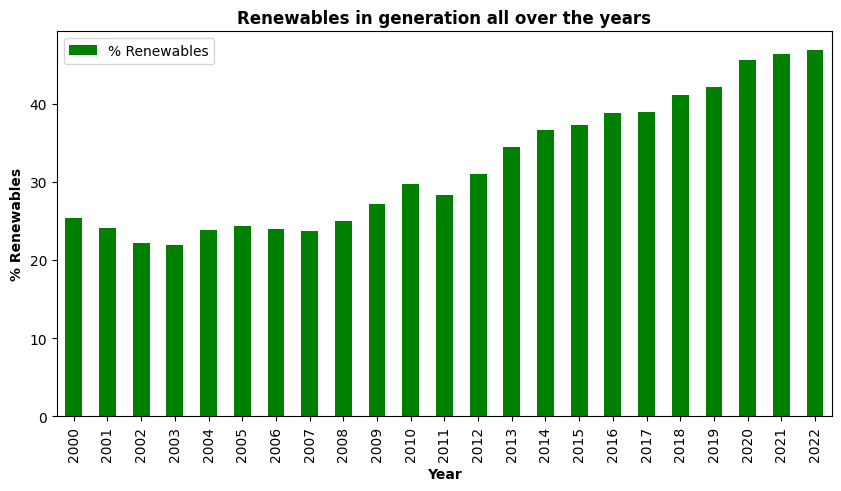

In [93]:
myplot(electricity_data_1, "bar","Year","% Renewables","Year","% Renewables", "Renewables in generation all over the years","green")
#myplot(movies_pop_genres,"barh", "genres", "popularity", "Popularity", "Genre", "Popularity by Genre", "orange")

As we can see in the plot above from 2000 to 2022, the percetage of Renewables among the generation of electricity has been increasing.

*Which are the top countries that produce energy from renewable sources? Is there a relationship between it  and the electricity wholesale price?*

In [94]:
#Create a new df to see the average % of Renewables per country:
electricity_data_2 = electricity_data.groupby("Country").mean(numeric_only=True).reset_index()
electricity_data_2 = electricity_data_2.sort_values(by="% Renewables", ascending=True)

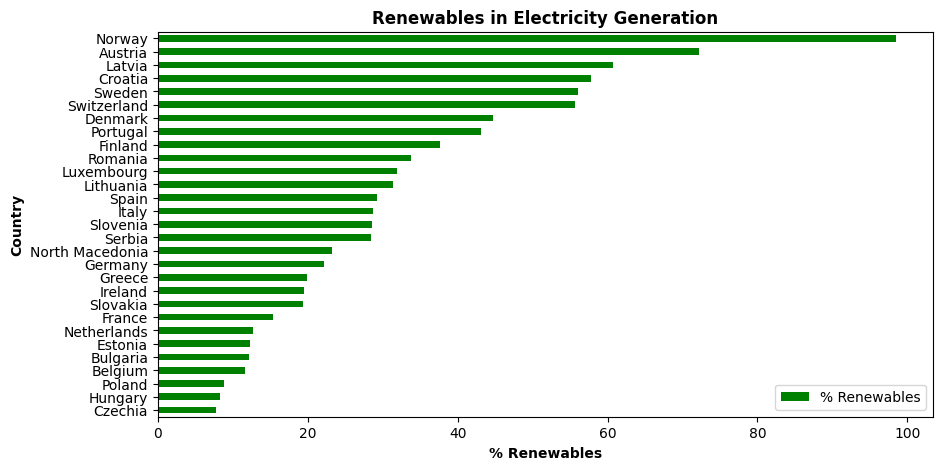

In [95]:
#Plot it
myplot(electricity_data_2, "barh","Country","% Renewables","% Renewables","Country", "Renewables in Electricity Generation","green")

In [96]:
#Create a new df to see the average Price of electricity per country:
electricity_data_3 = electricity_data.groupby("Country").mean(numeric_only=True).reset_index()
electricity_data_3 = electricity_data_3.sort_values(by="Price (EUR/MWhe)", ascending=False)

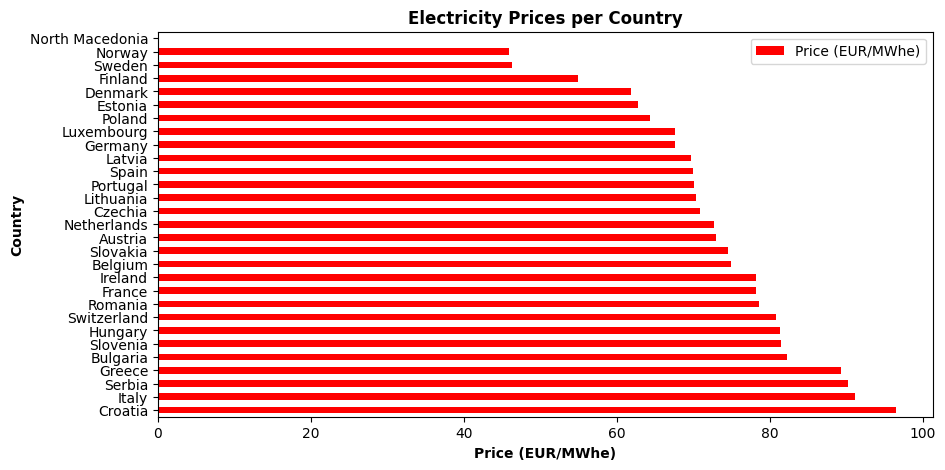

In [97]:
#Plot it:
myplot(electricity_data_3, "barh","Country","Price (EUR/MWhe)","Price (EUR/MWhe)","Country", "Electricity Prices per Country","red")

In [98]:
#Filtering the main dataset to see Norway numbers:
electricity_data[electricity_data["Country"]=="Norway"]

,Country,Year,Demand MWh per capita,Imports TWh,Emissions mtCO2,Generation TWh,Bioenergy,Coal,Gas,Hydro,...,Other Fossil,Other Renewables,Solar,Wind,Renewables,Non Renewables,% Renewables,% Non Renewables,Price (EUR/MWhe),Temperature Change ºC
437,Norway,2000,27.47,-19.05,3.64,142.43,0.26,0.04,0.21,141.82,...,0.07,0.00,0.00,0.03,142.11,0.32,99.775328,0.224672,NaN,1.440
438,Norway,2001,27.63,3.57,3.20,121.16,0.25,0.04,0.24,120.46,...,0.14,0.00,0.00,0.03,120.74,0.42,99.653351,0.346649,NaN,0.625
439,Norway,2002,26.53,-9.71,3.42,130.12,0.25,0.04,0.20,129.37,...,0.18,0.00,0.00,0.08,129.70,0.42,99.677221,0.322779,NaN,1.398
440,Norway,2003,25.07,7.87,2.94,106.59,0.33,0.04,0.30,105.48,...,0.22,0.00,0.00,0.22,106.03,0.56,99.474622,0.525378,NaN,1.117
441,Norway,2004,26.44,11.45,3.03,109.98,0.36,0.04,0.37,108.78,...,0.18,0.00,0.00,0.25,109.39,0.59,99.463539,0.536461,NaN,1.315
442,Norway,2005,27.05,-12.04,3.68,137.10,0.33,0.04,0.38,135.69,...,0.16,0.00,0.00,0.50,136.52,0.58,99.576951,0.423049,NaN,1.780
443,Norway,2006,26.16,0.85,3.35,121.09,0.39,0.04,0.47,119.37,...,0.18,0.00,0.00,0.64,120.40,0.69,99.430176,0.569824,NaN,1.519
444,Norway,2007,26.74,-10.03,3.85,135.94,0.39,0.04,0.76,133.66,...,0.20,0.00,0.00,0.89,134.94,1.00,99.264381,0.735619,NaN,1.703
445,Norway,2008,26.67,-13.86,3.82,141.02,0.40,0.04,0.44,139.04,...,0.19,0.00,0.00,0.91,140.35,0.67,99.524890,0.475110,NaN,1.633
446,Norway,2009,25.25,-8.98,5.27,130.90,0.23,0.04,4.23,125.28,...,0.14,0.00,0.00,0.98,126.49,4.41,96.631016,3.368984,NaN,1.405


The country with the highest percentage of renewables in elecricity generation is Norway, followed by Austria, Latvia, Croatia and Sweden. If we look at the plot of prices, we can see that 2 of these countries, Norway and Sweden are also the countries with the lowest prices of electricity. Furthermore, looking at the main dataset we can see that most of the production of electricity is from hydropower in Norway.

*What are the numbers of demand per capita, CO2 emission and temperature change all over the years?*

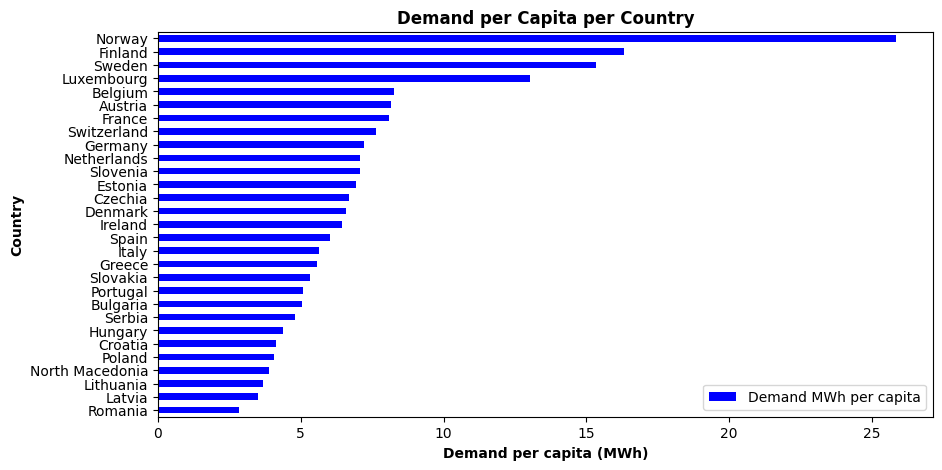

In [99]:
electricity_data_4 = electricity_data_2.sort_values(by="Demand MWh per capita", ascending=True)
myplot(electricity_data_4, "barh","Country","Demand MWh per capita","Demand per capita (MWh)","Country", "Demand per Capita per Country","blue")

The country with the higheste demand per capita is Norway, the same country with the higest pecentage of renewables and lowest wholesale electricity price. This high demand of energy can be due to the low temperatures of this country. Among the top 3 we can see they are all nordic countries.

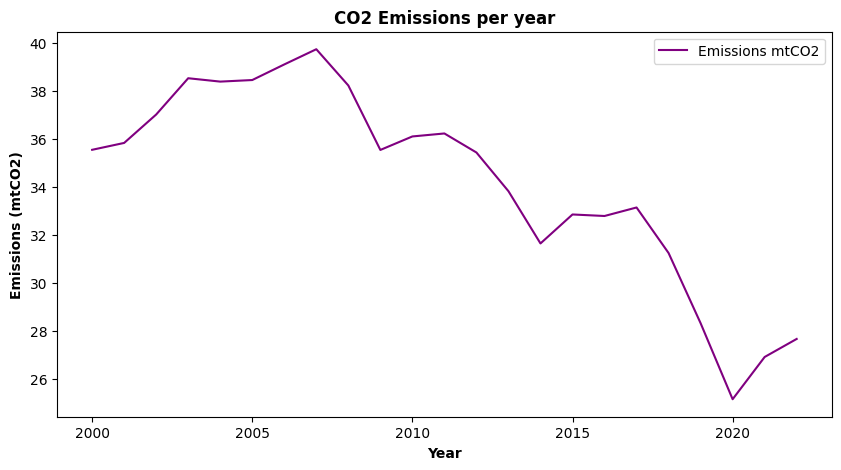

In [100]:
#Plot Co2 emissions:
myplot(electricity_data_1, "line","Year","Emissions mtCO2","Year","Emissions (mtCO2)", "CO2 Emissions per year","purple")

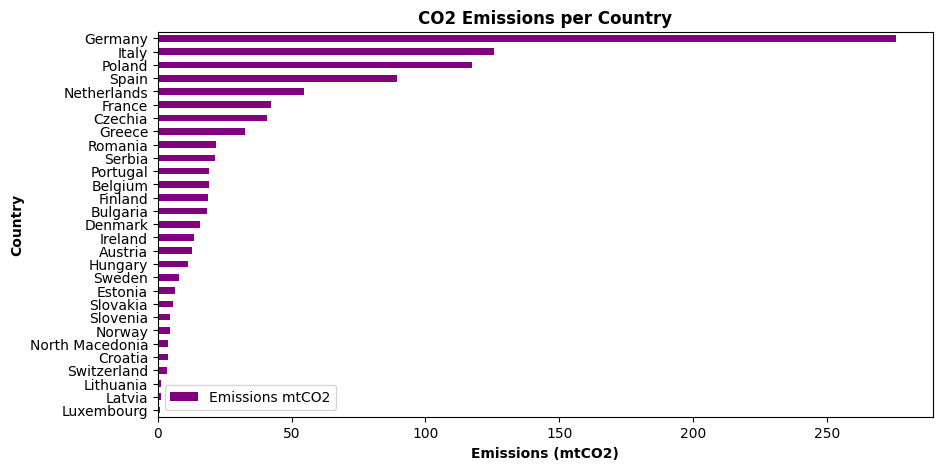

In [101]:
#Plot CO2 emissions per country:
electricity_data_5 = electricity_data_2.sort_values(by="Emissions mtCO2", ascending=True)

myplot(electricity_data_5, "barh","Country","Emissions mtCO2","Emissions (mtCO2)","Country", "CO2 Emissions per Country","purple")

In [102]:
#Filtering Germany
electricity_data_Germany=electricity_data[electricity_data["Country"]=="Germany"]

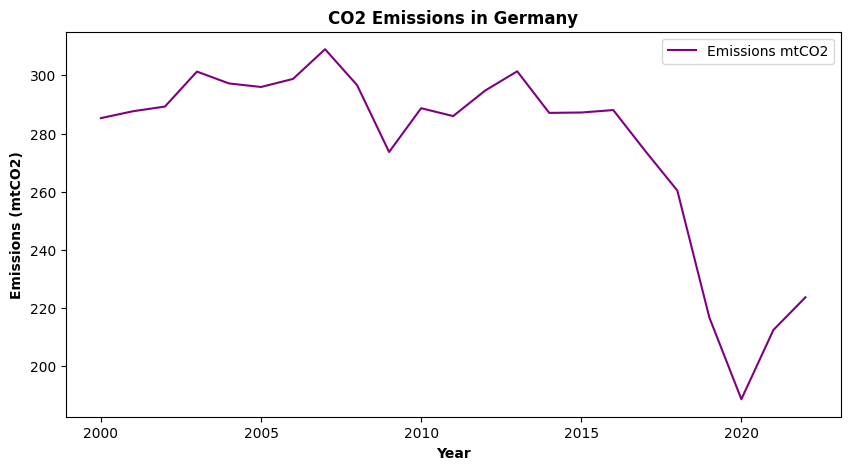

In [103]:
#Plotting Co2 emissions in Germany:
myplot(electricity_data_Germany, "line","Year","Emissions mtCO2","Year","Emissions (mtCO2)", "CO2 Emissions in Germany","purple")

As we can see in the plots, CO2 emissions tend to decrease all ove the years. The country with the highest emissions is by far Germany. However this analysis in not very accurate because it should be emission per capita. Other interesting aspect is that in 2020 (pandemic year) the CO2 emission decreased significantly, not only in Germany but in general. It mus be due to the close of many industries.

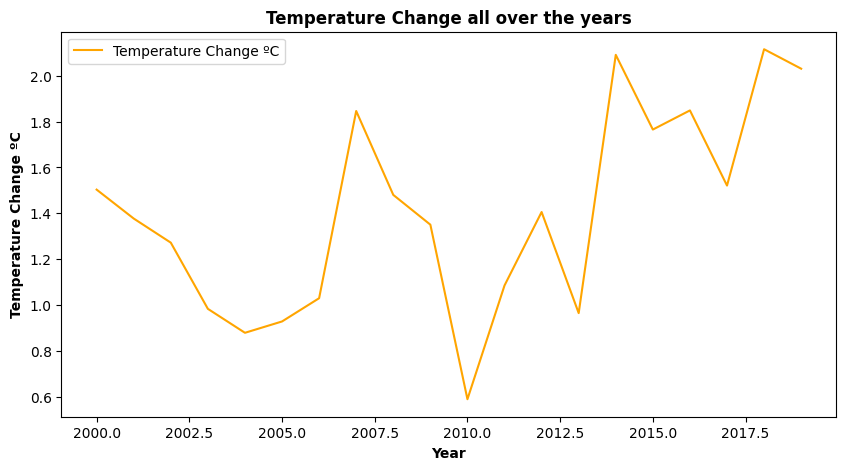

In [104]:
#Plot temperature change:
myplot(electricity_data_1, "line","Year","Temperature Change ºC","Year","Temperature Change ºC", "Temperature Change all over the years","ORANGE")

In terms of temperature change all over the years of this study, in Europe, it seem to have a tendency of increasing.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*If I had more time to complete this task I would collect census data so I can calculate electricity data per capita, as emissions. It would improve my study. I would also collect more data about prices, with more years. I think these datasets are good but could improved with more information. Also I would need more time to do a better study relating the tempeature change with my actual data.*